hrv_lr200511.nc


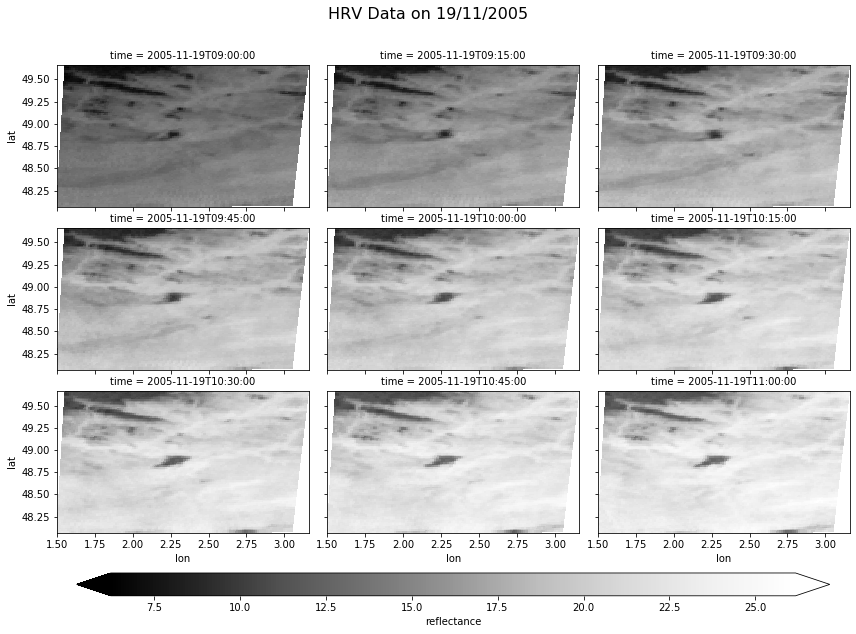

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime


result_dir = "/mnt/ls03-no-backup/JF/urban_cloud/results/paris/"

# List of sample dates in day/month/year format
dates = [
    "19/11/2005", "20/11/2005", "07/11/2006", "30/11/2006",
    "19/02/2007", "17/01/2015", "17/02/2013", "02/11/2015",
    "12/11/2015", "23/11/2015", "20/01/2016", "21/01/2016",
    "30/12/2016", "18/02/2017", "17/02/2017", "05/02/2019",
    "13/02/2019", "20/02/2019"
]

# Convert strings into datetime objects
dates = [datetime.strptime(date, "%d/%m/%Y") for date in dates]

# Define a colormap for the plots
#cmap = plt.cm.viridis  # You can choose any other colormap if preferred
cmap = plt.get_cmap('Greys_r')#
# Loop over each date
for date in dates[0:1]:
    year = date.year
    month = date.month

    # Formulate the file name
    file_name = f"hrv_lr{year:04d}{month:02d}.nc"
    print(file_name)
    # Read the data file
    try:
        hrv_data = xr.open_dataset(path + file_name)
    except FileNotFoundError:
        print(f"File not found: {file_name}")
        continue

    # Extract the relevant time slots (assumes the data has a time dimension)
    start_time = date.replace(hour=9, minute=0)
    end_time = date.replace(hour=11, minute=0)
    time_slice = hrv_data.hrv.sel(time=slice(start_time, end_time))

    # Plot using xarray's built-in facet grid functionality
    time_slice.plot(x='lon', y='lat', col='time', col_wrap=3, cmap=cmap, figsize=(12, 10),
                    aspect=1, cbar_kwargs={"label": "reflectance",'orientation': 'horizontal','pad': 0.04,'shrink':0.95,'aspect': 30,'extend':'both','format':"%0.1f"})

    # Add an overall title for the figure
    plt.suptitle(f"HRV Data on {date.strftime('%d/%m/%Y')}", fontsize=16)
    
    # Adjust layout
    plt.subplots_adjust(top=0.9, bottom=0.25, hspace=0.15)#vspace=0.15)
    # Show or save the plot
    plt.show()
    #plt.savefig(result_dir + f"hrv_multicol_{date.strftime('%Y%m%d')}rand.png", dpi=300)
    #plt.close()